In [18]:
import matplotlib.pylab as plt
from matplotlib import cm
import math
import pandas as pd
import numpy as np
import random

%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=False)
plt.rc('font', family='DejaVu Sans')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=12) 

In [19]:
data = pd.read_csv("ch04/ACCIDENTS_GU_BCN_2013.csv", encoding='latin-1')
print (data.columns)

Index(['Número d'expedient', 'Codi districte', 'Nom districte', 'NK barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripció dia setmana', 'Dia de setmana', 'Descripció tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripció torn', 'Descripció causa vianant', 'Número de morts',
       'Número de lesionats lleus', 'Número de lesionats greus',
       'Número de víctimes', 'Número de vehicles implicats',
       'Coordenada UTM (Y)', 'Coordenada UTM (X)'],
      dtype='object')


In [20]:
data.head()

,Número d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia de setmana,...,Hora de dia,Descripció torn,Descripció causa vianant,Número de morts,Número de lesionats lleus,Número de lesionats greus,Número de víctimes,Número de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X)
0,2013S007360,-1,Desconegut,-1--1--1,Desconegut,-1,Desconegut,Desconegut,Dimecres,3,...,21,Tarda,Desconegut,0,1,0,1,2,-1,-1
1,2013S007723,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,152600,Guinardó,0028 0032,Dimarts,2,...,21,Tarda,Desconegut,0,1,0,1,2,"4585218,67","431621,41"
2,2013S005373,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,134801,Freser,0053 0053,Dimarts,2,...,10,Matí,Creuar per fora pas de vianants,0,1,0,1,1,"4585049,89","431605,09"
3,2013S001486,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161407,Indústria,0224 0224,Dimarts,2,...,10,Matí,Altres,0,1,0,1,1,"4584836,20","431302,26"
4,2013S008254,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161101,Independència,0357 0357,Dilluns,1,...,16,Tarda,Desconegut,0,1,0,1,2,"4584704,26","431385,76"


In [21]:
#Create a new column which is the date
data['Date'] = '2013-'+data['Mes de any'].apply(lambda x : str(x)) + '-' +  data['Dia de mes'].apply(lambda x : str(x))
data['Date'] = pd.to_datetime(data['Date'])
accidents = data.groupby(['Date']).size()
print ("Mean:", accidents.mean())

Mean: 25.90958904109589


In [22]:
data.head()

,Número d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia de setmana,...,Descripció torn,Descripció causa vianant,Número de morts,Número de lesionats lleus,Número de lesionats greus,Número de víctimes,Número de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X),Date
0,2013S007360,-1,Desconegut,-1--1--1,Desconegut,-1,Desconegut,Desconegut,Dimecres,3,...,Tarda,Desconegut,0,1,0,1,2,-1,-1,2013-10-16
1,2013S007723,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,152600,Guinardó,0028 0032,Dimarts,2,...,Tarda,Desconegut,0,1,0,1,2,"4585218,67","431621,41",2013-10-29
2,2013S005373,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,134801,Freser,0053 0053,Dimarts,2,...,Matí,Creuar per fora pas de vianants,0,1,0,1,1,"4585049,89","431605,09",2013-07-23
3,2013S001486,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161407,Indústria,0224 0224,Dimarts,2,...,Matí,Altres,0,1,0,1,1,"4584836,20","431302,26",2013-02-26
4,2013S008254,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161101,Independència,0357 0357,Dilluns,1,...,Tarda,Desconegut,0,1,0,1,2,"4584704,26","431385,76",2013-11-18


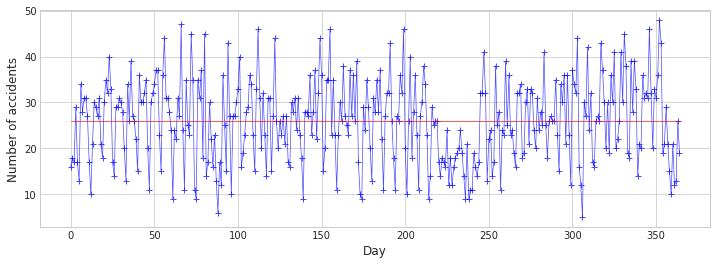

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.ylabel('Number of accidents')
plt.xlabel('Day')
plt.plot(range(0, 365), np.array(accidents), 'b-+', lw=0.7, alpha=0.7)
plt.plot(range(0, 365), [accidents.mean()]*365, 'r-', lw=0.7, alpha=0.9)
plt.show()

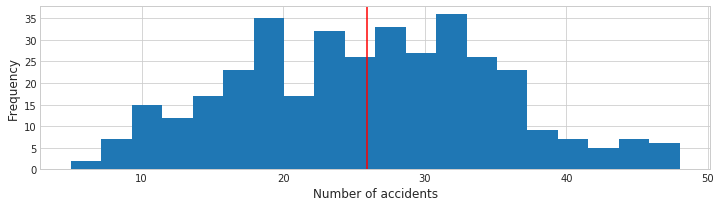

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
plt.ylabel('Frequency')
plt.xlabel('Number of accidents')
plt.hist(np.array(accidents), bins=20)
ax.axvline(x=accidents.mean(), ymin=0, ymax=40, color=[1, 0, 0])
plt.savefig("bootmean.png",dpi=300, bbox_inches='tight')
plt.show()

In [25]:
print ("Mean:", accidents.mean(), "; STD:", accidents.std())

Mean: 25.90958904109589 ; STD: 9.108324962464705


In [26]:
df = accidents.to_frame()
m = []

for i in range(10):
    df['for_testing'] = False
    # get a 25% sample 
    sampled_ids = np.random.choice(df.index,
                                   size=np.int64(np.ceil(df.index.size * 0.25)),
                                   replace=False)
    df.ix[sampled_ids, 'for_testing'] = True
    accidents_sample = df[df['for_testing'] == True]
    m.append(accidents_sample[0].mean())
    print  ('Sample '+str(i)+': Mean', '%.2f' % accidents_sample[0].mean())
    

Sample 0: Mean 27.52
Sample 1: Mean 25.87
Sample 2: Mean 24.23
Sample 3: Mean 25.17
Sample 4: Mean 27.50
Sample 5: Mean 26.32
Sample 6: Mean 24.83
Sample 7: Mean 26.39
Sample 8: Mean 25.15
Sample 9: Mean 26.82


Text(0.5,0,'Sample')

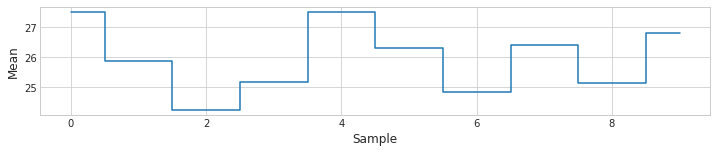

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
x = range(10)
ax.step(x,m, where='mid')
ax.set_ylabel('Mean')
ax.set_xlabel('Sample')

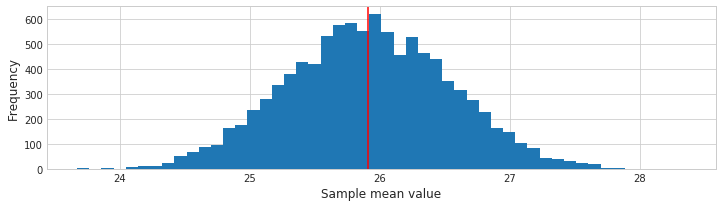

Sample mean: 25.909827999999997


In [28]:
plt.autumn()

# population
df = accidents.to_frame()    
N_test = 10000              
elements = 200             

# mean array of samples
means = [0] * N_test             

# sample generation
for i in range(N_test):          
    rows = np.random.choice(df.index.values, elements)
    sampled_df = df.ix[rows]
    means[i] = sampled_df.mean()
    
fig, ax = plt.subplots(1, 1, figsize=(12,3))

plt.hist(np.array(means),bins=50)
plt.ylabel('Frequency')
plt.xlabel('Sample mean value')
ax.axvline(x = np.array(means).mean(), 
           ymin = 0, 
           ymax = 700, 
           color = [1, 0, 0])
plt.savefig("empiricalmean.png",dpi=300, bbox_inches='tight')
plt.show()
plt.set_cmap(cmap=cm.Pastel2)

print ("Sample mean:", np.array(means).mean())

In [29]:
rows = np.random.choice(df.index.values, 200)
sampled_df = df.ix[rows]
est_sigma_mean = sampled_df.std()/math.sqrt(200)

print ('Direct estimation of SE from one sample of 200 elements:', \
       est_sigma_mean[0])
print ('Estimation of the SE by simulating 10000 samples of 200 elements:',  \
       np.array(means).std())

Direct estimation of SE from one sample of 200 elements: 0.688527669566586
Estimation of the SE by simulating 10000 samples of 200 elements: 0.6388102460167652


In [30]:
def meanBootstrap(X,numberb):
    import numpy as np
    x = [0]*numberb
    for i in range(numberb):
        sample = [X[_] for _ in np.random.randint(len(X), size=len(X))]
        x[i] = np.mean(sample)
    return x

m = meanBootstrap(accidents, 10000)
print ("Mean estimate:", np.mean(m))

Mean estimate: 25.910600547945204


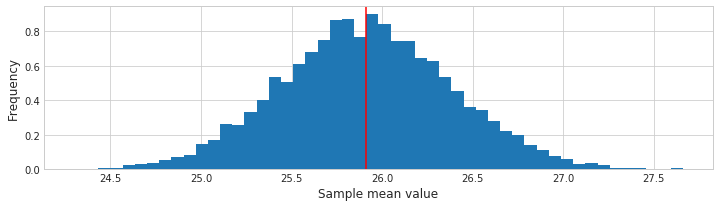

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
plt.ylabel('Frequency')
plt.xlabel('Sample mean value')
plt.hist(m, 
         bins = 50, 
         normed = True)
ax.axvline(x = np.mean(m), 
           ymin = 0.0, 
           ymax = 1.0, 
           color = [1, 0, 0])

Median estimate: 26.2976


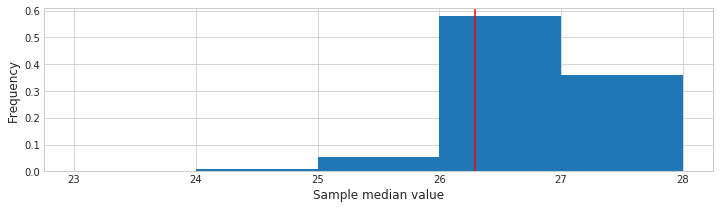

In [32]:
def medBootstrap(X,numberb):
    import numpy as np
    x = [0]*numberb
    for i in range(numberb):
        sample = [X[_] for _ in np.random.randint(len(X), size=len(X))]
        x[i] = np.median(sample)
    return x

med = medBootstrap(accidents, 10000)
print ("Median estimate:", np.mean(med) )
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
plt.hist(med, bins=5, normed=True)
plt.ylabel('Frequency')
plt.xlabel('Sample median value')
ax.axvline(x = np.array(med).mean(), 
           ymin = 0, 
           ymax = 1.0, 
           color = [1, 0, 0])

In [33]:
m = accidents.mean()
se = accidents.std()/math.sqrt(len(accidents))
ci = [m - se*1.96, m + se*1.96]
print ("Confidence interval:", ci)


Confidence interval: [24.975156065800284, 26.8440220163915]
